# 线性模型

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 线性回归（Linear Reression）
给定数据集$D={(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)}$，学习一个线性模型$f(x)$，使得
$$y_i=f(x_i)={\omega}x_i+b$$
当给定一个新的输入$x_j$时，该模型会输出$y_j$。

但绝大多数情况，我们很难得到一个完美的模型，对于数据集$D$中的所有输入$x_i$，都给出与对应$y_i$完全相同的输出值。我们需要尽可能缩小预测值$\hat{y_i}$和$y_i$的距离$(\hat{y_i}-y_i)^2$。对于数据集$D$的所有数据，我们就要使得“均方误差”
$$
E(\omega, b)=\frac{1}{m}\sum\limits_{i=1}^n(\hat{y_i}-y_i)^2
$$
的值尽可能小，也就是模型给出的预测输出和数据集$D$的“距离”尽可能小。模型的学习过程就是调整模型的参数$\omega$和$b$，使得均方误差（损失函数）尽可能小，进一步拟合给出的数据集。

均方误差实际上是一个关于$w$和$b$函数表达式
\begin{aligned}
E(\omega, b)&=\frac{1}{m}\sum\limits_{i=1}^n(\hat{y_i}-y_i)^2\\
&=\frac{1}{m}\sum\limits_{i=1}^n{(f(x_i)-y_i)}^2\\
&=\frac{1}{m}\sum\limits_{i=1}^n{(wx_i+b-y_i)}^2
\end{aligned}
要使得均方误差最小，只需要分别对$w$和$b$求偏导并令其等于0
$$\frac{\partial{E_{(w,b)}}}{\partial{w}}=2\sum\limits_{i=1}^n(wx_i+b-y_i)x_i=0$$
$$\frac{\partial{E_{(w,b)}}}{\partial{b}}=2\sum\limits_{i=1}^n{(wx_i+b-y_i)}=2\sum\limits_{i=1}^n{(wx_i-y_i)}+2nb=0$$
可解得
$$w=\frac{\sum\limits_{i=1}^my_i(x_i-\bar{x})}{\sum\limits_{i=1}^mx_i^2-\frac{1}{m}(\sum\limits_{i=1}^mx_i)^2}$$
$$b=\frac{1}{m}\sum\limits_{i=1}^m(y_i-wx_i)$$
此时该线性模型对数据集$D$的的“距离”是最小的。这种方法也叫做**最小二乘法**


In [3]:
np.random.seed(0) # 实验的时候先固定随机数种子，保证结果可复现
X = np.arange(1, 6)
Y = np.arange(1, 6) + np.random.normal(0, 0.1, size=5)
X, Y
# [1, 2, 3, 4, 5]
# [1.17640523, 2.04001572, 3.0978738 , 4.22408932, 5.1867558 ]

(array([1, 2, 3, 4, 5]),
 array([1.17640523, 2.04001572, 3.0978738 , 4.22408932, 5.1867558 ]))

1.0204774727919885
0.08359555617987549


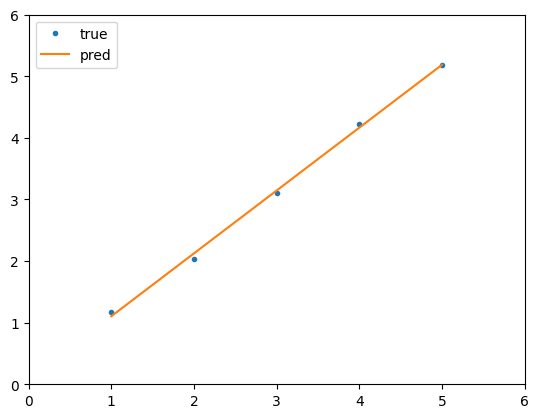

In [4]:
x_bar = X.mean()
m = 5
p, q, b = 0, 0, 0
for i in range(m):
    p += Y[i]*(X[i] - x_bar)
    q += X[i]**2
w = p / (q - 1/m*X.sum()**2)
for i in range(m):
    b += Y[i] - w*X[i]
b /= m

print(w)
print(b)

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.plot(X, Y, '.')
plt.plot(X, w*X+b)
plt.legend(['true', 'pred'])

## 多元线性回归
如果我们预测的东西和不止一种属性特征有关系。例如我们要预测房屋的价格$y$，它跟房屋的面积大小、楼层、位置等都有关系，但是各自对房屋价格的影响大小不同，相对于各自有一个权重$w$，来控制各个特征对于房屋价格$y$的重要性。我们目标就是找到一个合适的权重向量，分配给各个特征属性$x_i$，尽可能准确预测房屋价格。

对于这种更一般的情况进行线性回归，即给定输入向量$\bold{x_i^T}=(x_1, x_2, ..., x_n)$，$\bold{w^T}=(w_1, w_2, ..., w_n)$权重向量，我们试图得到一个线性模型
$$
y=f(x)=\omega_1x_1+\omega_2x_2+...+\omega_nx_n+b=\bold{w^T}\bold{x_i}+b
$$
为了方便研究，令$\hat{\bold{w}}=(\bold{w};b)$，相应地，把各个$\bold{x_i}$也表示成矩阵的形式
$$
X=
\begin{pmatrix}
    x_{11} & x_{12} & \cdots & x_{1n} & 1 \\
    x_{21} & x_{22} & \cdots & x_{2n} & 1 \\
    \vdots & \vdots & \ddots & \vdots & \vdots \\
    x_{m1} & x_{m2} & \cdots & x_{mn} & 1 \\
\end{pmatrix}
=
\begin{pmatrix}
    \bold{x_1^T} & 1 \\
    \bold{x_2^T} & 1 \\
    \vdots       & \vdots \\
    \bold{x_m^T} & 1
\end{pmatrix}
$$
则有
$$
y=\hat{\bold{w}}^T\bold{X}
$$
类似地，利用最小二乘法来对参数进行估计，也即是要尽可能缩小预测值和实际值的距离（欧几里得距离）
$$
E(\hat{\bold{W}})=\frac{1}{m}(\bold{y}-\bold{X}\hat{\bold{w}})^T(\bold{y}-\bold{X}\bold{\hat{w}})
$$
我们目标就是求解上式最小时$\bold{\hat{w}}$的值，即$\frac{\partial{E_{\bold{\hat{w}}}}}{{\partial{\bold{\hat{w}}}}}=0$时$\bold{\hat{w}}$的值

为了求解该式，我们需要一些关于向量求导的公式。我推导求解了以下式子：

1、$f(X)=A^TX$，其中$A^T=(a_1, a_2, ..., a_n)$, $X^T=(x_1, x_2, ..., x_n)$
$$
\frac{df(X)}{dX}=
    \begin{pmatrix}
    \frac{df(X)}{dx_1} \\
    \frac{df(X)}{dx_2} \\
    \vdots \\
    \frac{df(X)}{dx_n} \\
\end{pmatrix}
=
\begin{pmatrix}
    a_1 \\
    a_2 \\
    \vdots \\
    a_n
\end{pmatrix}
=A
$$
又有
$$
A^TX=\sum\limits_{i=1}^n{a_{i}x_i}=X^TA
$$
故有$\frac{df(X)}{dX}=\frac{d(A^TX)}{dX}=\frac{d(X^TA)}{dX}=A$。

2、$f(X)=X^TAX$，其中
$X^T=(x_1, x_2, ..., x_n)$，
$
A^T=
\begin{pmatrix}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    a_{21} & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nn}
\end{pmatrix}
$

对$f(X)$求导
$$
\frac{df(X)}{dX}=
\begin{pmatrix}
    \sum\limits_{j=1}^na_{1j}x_j+\sum\limits_{i=1}^na_{i1}x_i \\
    \sum\limits_{j=1}^na_{2j}x_j+\sum\limits_{i=1}^na_{i2}x_i \\
    \vdots \\
    \sum\limits_{j=1}^na_{nj}x_j+\sum\limits_{i=1}^na_{in}x_i
\end{pmatrix}
=AX+A^TX
$$
故$\frac{df(X)}{dX}=\frac{d(X^TAX)}{dX}=AX+A^TX$

总结：$\frac{d(A^TX)}{dX}=\frac{d(X^TA)}{dX}=A$，$\frac{d(X^TAX)}{dX}=AX+A^TX$

据此，我们计算求解$\frac{\partial{E_{\bold{\hat{w}}}}}{{\partial{\bold{\hat{w}}}}}=0$

$$
\begin{aligned}
    E(\hat{\bold{W}})
    &=(\bold{y}-\bold{X}\hat{\bold{w}})^T(\bold{y}-\bold{X}\bold{\hat{w}}) \\
    &=\bold{(y^T-\hat{W}^TX^T)(y-X\hat{W})} \\
    &=\bold{y^Ty-y^TX\hat{W}-\hat{W}^TX^Ty+\hat{W}^TX^TX\hat{W}}  
\end{aligned}
$$

于是
$$
\begin{aligned}
    \bold{\frac{\partial{E_{\bold{\hat{w}}}}}{{\partial{\bold{\hat{w}}}}}}
    &=\bold{0-\frac{\partial{(y^TX\hat{W})}}{\partial{\hat{W}}}-\frac{\partial{(\hat{W}^TX^Ty)}}{\partial{\hat{W}}}+\frac{\partial{(\hat{W}^TX^TX\hat{W})}}{\partial{\hat{W}}}} \\
    &=\bold{-y^TX-X^Ty+X^TX\hat{W}+(X^TX)^T\hat{W}} \\
    &=0
\end{aligned} 
$$
当$\bold{X^TX}$为满秩矩阵（或正定矩阵），即$\bold{X^TX=(X^TX)^T}$
则有
$$
\bold{-2X^Ty+2X^TX\hat{W}}=0
$$
得
$$
\bold{\hat{W}}^T=\bold{(X^TX)^{-1}X^Ty}
$$